# Notebook to produce the muscle image from Thad's figure 1, based on:

http://www.theodorelindsay.com/segmenting-and-colorizing-histology-stacks-in-python.html

## Imports

In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import gaussian_filter

## Load data

In [5]:
# load muscle data
data_dir = "/media/sam/SamData/ThadData/thad_paper_data/"
base_str = "muscle_segmentation/65G06_muscle_8bit_%(mu)s_layers/"+\
           "65G06_muscle_8bit_%(mu)s_layers%(num)s.tif"

segmented_data = {}
for muscle in ['b1','b2','b3','i1','i2',
               'iii1','iii24','iii3',
               'hg1','hg2','hg3','hg3','hg4']:
    
    f_names = [data_dir+base_str%{'mu':muscle,'num':i} for i in range(74)]
    segmented_data[muscle] = tifffile.imread(f_names,key = 0)
    print(muscle + ' loaded')

b1 loaded
b2 loaded
b3 loaded
i1 loaded
i2 loaded
iii1 loaded
iii24 loaded
iii3 loaded
hg1 loaded
hg2 loaded
hg3 loaded
hg3 loaded
hg4 loaded


In [37]:
# load phalloidin staining
ph_staining = tifffile.imread(data_dir + 'muscle_segmentation/' + \
                              'phalloidin_stained_hemithorax.tif')
ph_staining = ph_staining[::-1] #reverse the stack order


In [38]:
print(ph_staining.shape)

(74, 1024, 1024)


In [28]:
# also load cuticle
cuticle = tifffile.imread(data_dir + 'muscle_segmentation/65G06_brightfield_cuticle.tif',key = 0)

## Thad's functions

In [2]:
def max_segmented(muscle = 'i1',sig_z = 1.0,sig_xy = 5.0):
    blurred_mask = gaussian_filter(segmented_data[muscle][...,3],
                               sigma = (sig_z,sig_xy,sig_xy))
    blurred_mask = blurred_mask.astype(float)**8
    max_projection = np.max(blurred_mask*ph_staining,axis = 0)
    max_projection /= np.max(max_projection)
    alpha = np.max(blurred_mask,axis = 0)
    alpha -= np.min(alpha)
    alpha /= np.max(alpha)
    return max_projection,alpha


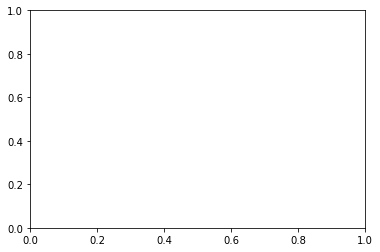

In [3]:
def plot_muscle(muscle, sig_z = 0.2, sig_xy = 1.0, cmap = plt.cm.Blues_r, ax = plt.gca()):
    maximg,alpha = max_segmented(muscle, sig_z = sig_z, sig_xy = sig_xy)
    muscle_color = cmap(maximg)
    muscle_color[...,3] = 0.8*alpha
    ax.imshow(muscle_color,extent = xtnt)

## Testing

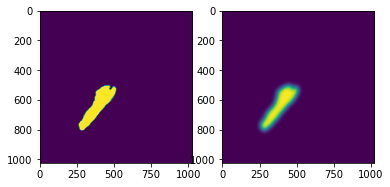

In [29]:
plt.subplot(1,2,1)
plt.imshow(segmented_data['i1'][50,:,:,3])
plt.subplot(1,2,2)
#the edge blur is more apparent with a non grayscale colormap.
plt.imshow(gaussian_filter(segmented_data['i1'][50,:,:,3],sigma = 15.))

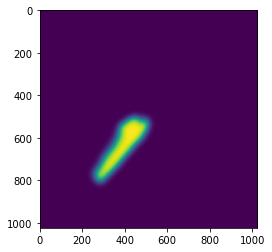

In [30]:
blurred_mask = gaussian_filter(segmented_data['i1'][...,3],
                               sigma = (1.,15.0,15.0))
blurred_mask = blurred_mask.astype(float)
plt.imshow(blurred_mask[50])
#looks a little different

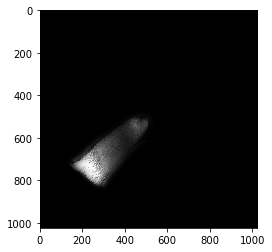

In [39]:
max_projection = np.max(blurred_mask*ph_staining,axis = 0)
max_projection /= np.max(max_projection)
plt.imshow(max_projection,cmap = plt.cm.gray)

## Make figure

(50, 600)

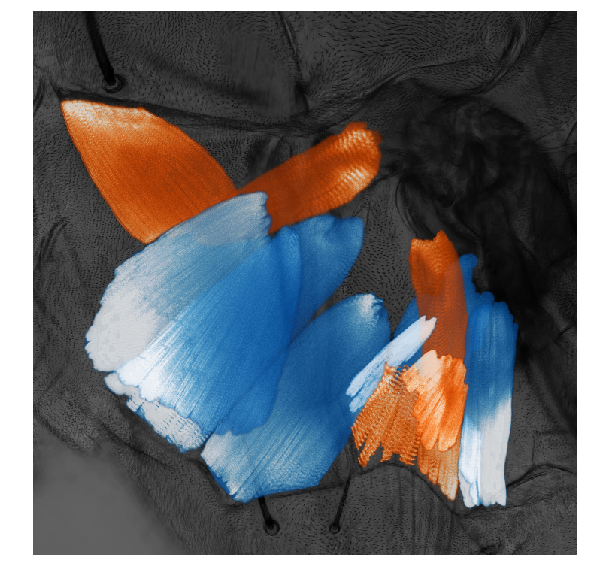

In [50]:
# generate figure window and add cuticle
fig, ax = plt.subplots(figsize=(10,10))

# copied from Thad:
PPCH = 0.76

#plt.figure(figsize = (10,10))
xextent = PPCH* np.shape(cuticle)[0]
yextent = PPCH* np.shape(cuticle)[1]
xtnt = [0,xextent,0,yextent]

ax.imshow(cuticle,
           cmap = plt.cm.gray,
           clim = (0,500),extent = xtnt)

# plot muscles
plot_muscle('hg1',cmap = plt.cm.Blues_r, ax=ax)

plot_muscle('i1',cmap = plt.cm.Blues_r, ax=ax)
plot_muscle('i2',cmap = plt.cm.Oranges_r, ax=ax)

plot_muscle('iii1',cmap = plt.cm.Blues_r, ax=ax)
plot_muscle('iii24',cmap = plt.cm.Blues_r, ax=ax)
plot_muscle('iii3',cmap = plt.cm.Oranges_r, ax=ax)

plot_muscle('b1',cmap = plt.cm.Oranges_r, ax=ax)
plot_muscle('b3',cmap = plt.cm.Oranges_r, ax=ax)
plot_muscle('b2',cmap = plt.cm.Blues_r, ax=ax)

plot_muscle('hg2',cmap = plt.cm.Blues_r, ax=ax)
plot_muscle('hg3',cmap = plt.cm.Blues_r, ax=ax)
plot_muscle('hg4',cmap = plt.cm.Oranges_r, ax=ax)

# turn axes off
ax.set_axis_off()

# trim axes?
ax.set_xlim(50,600)
ax.set_ylim(50,600)

## Save figure

In [51]:
# where to save 
save_path = "/media/sam/SamData/Dropbox/Application Materials/Grants/Misc/CES 2023"

fig.savefig(os.path.join(save_path, "muscle_confocal.svg"))